### Exercise PCR and PLS

####  Dataset abalone contains different measurements of Abalones including rings, weights, length, sex, etc. The Rings are important since Rings are directly connected to the Abalone age. Here we would try to predict abalones rings based on other data. We will use PCR and PLS and find out the best methods and if we can reduce the number of the feature while using ML.

##### Steps Basic PCA analyisis:
1. Load dataset
2. Convert the 'Sex' column to Numerical value as a category
3. Standerzing data coumn
4. Draw a PCA plot to see if any of the columns are adversely correlated, we would drop it. I have not found any column that is negatively correlated with our target so I decided to keep all columns for PCR and would reduce after croos-validation if possible. Tough this Basic plot was not important but I kept it.


#### Steps PCR

1. Divide the dataset into training and test samples, I did select 20% random data for the test and the rest of 80% for training
2. Now from PC we will Keep the principal components that explain most of the variance (where N < p), where N is determined by cross-validation
3. Fit an LR model (using ordinary least squares) on these N principal components


In [212]:
# library 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [175]:
df=pd.read_csv('abalone.csv')


In [176]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [232]:
# sex column convert into numerical value
output = []
for x in df['Sex']:
    if x not in output:
        output.append(x)
print(output)

for i in range(len(output)):
    df.loc[df['Sex'] == output[i], 'Sex'] = i
    



['M', 'F', 'I']


In [233]:
new_df = df

In [234]:
new_df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [182]:
# Standardize the Data

features = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Rings']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
print('New Standardize the Data:')
x


New Standardize the Data:


array([[-1.15434629, -0.57455813, -0.43214879, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [-1.15434629,  0.6329849 ,  0.67640943, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.05379815,  0.84118198,  0.77718745, ...,  0.77334105,
         0.73362741,  0.41073914],
       [-1.15434629,  1.54905203,  1.48263359, ...,  2.64099341,
         1.78744868,  1.84048058]])

##converting the 8  coulmn as a feature and last column 'Ring' as a target. So for PCA dimension reduction I have used  column, the code projects the 8 dimensional into 2 dimensions. 

In [183]:
# using PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,columns = ['PC 1', 'PC 2'])
print('Output of 2-dimensional Principal component column:')
principalDf 

Output of 2-dimensional Principal component column:


,PC 1,PC 2
0,-1.479978,-1.485778
1,-3.052013,-1.821987
2,-0.482987,-0.050939
3,-1.238138,-1.445609
4,-3.835864,0.483813
...,...,...
4172,0.773172,0.208324
4173,0.942014,-0.974509
4174,2.359221,-0.695470
4175,1.600833,0.397308


In [184]:
# PCA adding with Target 'Rings'

finalDf = pd.concat([principalDf, df[['Rings']]], axis = 1)
finalDf

,PC 1,PC 2,Rings
0,-1.479978,-1.485778,15
1,-3.052013,-1.821987,7
2,-0.482987,-0.050939,9
3,-1.238138,-1.445609,10
4,-3.835864,0.483813,7
...,...,...,...
4172,0.773172,0.208324,11
4173,0.942014,-0.974509,10
4174,2.359221,-0.695470,9
4175,1.600833,0.397308,10


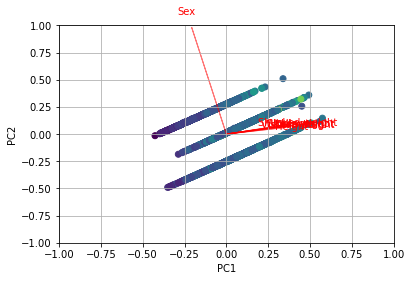

In [185]:
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)    

pca = PCA()
x_new = pca.fit_transform(x)

def myplot(score,coeff,labels=None):
    
    features = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, features[i], color = 'r', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

### PCR
##### 1. Dividte dataset into training and test sample

In [299]:
df=new_df
target = 'Rings'
X = df.drop(target,axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run standardization on X variables
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


#### Function creation for cross validation and Linear Regression

In [273]:
# Define cross-validation folds
cv = KFold(n_splits=10, shuffle=True, random_state=42)


# Linear Regression
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
lr_score_train = -1 * cross_val_score(lin_reg, X_train_scaled, y_train, cv=cv, scoring='neg_root_mean_squared_error').mean()
lr_score_test = mean_squared_error(y_test, lin_reg.predict(X_test_scaled), squared=False)


In [274]:
# Generate all the principal components
pca = PCA() # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(X_train_scaled)

# View first 5 rows of all principal components
pd.DataFrame(pca.components_.T).loc[:4,:]

,0,1,2,3,4,5,6,7
0,-0.203212,0.978930,0.013725,0.006840,0.003342,-0.007963,-0.009478,0.001546
1,0.375560,0.088434,-0.009813,-0.591960,0.089221,-0.030550,0.700919,0.020995
2,0.376135,0.075036,0.014977,-0.589973,0.008428,-0.008642,-0.710151,-0.011807
3,0.337148,0.055561,0.898272,0.236626,0.139883,0.026917,0.008149,-0.000722
4,0.383227,0.080308,-0.210116,0.252726,-0.050299,0.114361,-0.019049,0.850116


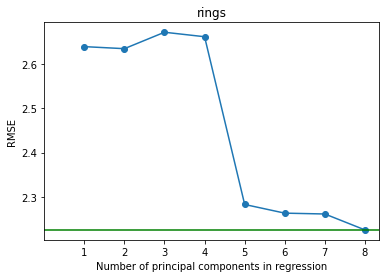

In [275]:
# Initialize linear regression instance
lin_reg = LinearRegression()

# Create empty list to store RMSE for each iteration
rmse_list = []

# Loop through different count of principal components for linear regression
for i in range(1, X_train_pc.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                                      X_train_pc[:,:i], # Use first k principal components
                                      y_train, 
                                      cv=cv, 
                                      scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)
    
# Visual analysis - plot RMSE vs count of principal components used
plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('rings')
plt.xlim(xmin=-1);
plt.xticks(np.arange(X_train_pc.shape[1]), np.arange(1, X_train_pc.shape[1]+1))
plt.axhline(y=lr_score_train, color='g', linestyle='-');

We see that the training set performance of PCR improves (i.e., RMSE decreases) with more principal components, in line with what we expect.

The green line is the RMSE benchmark from the baseline standard linear regression model using all original features.

The plot shows that the lowest cross-validation RMSE (minimum point in the plot) occurs when there are 8 principal components. However, we can see if we use 5 PC it also produce similar performance as keeping 6, 7 and almost 8.

In [293]:
# Visually determine optimal number of principal components


for i in range(8):
    best_pc_num = i+1

    # Train model with first  principal components
    lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

    # Get cross-validation RMSE (train set)
    pcr_score_train = -1 * cross_val_score(lin_reg_pc, 
                                           X_train_pc[:,:best_pc_num], 
                                           y_train, 
                                           cv=cv, 
                                           scoring='neg_root_mean_squared_error').mean()

    # Train model on training set
    lin_reg_pc = LinearRegression().fit(X_train_pc[:,:best_pc_num], y_train)

    # Get first 6 principal components of test set
    X_test_pc = pca.transform(X_test_scaled)[:,:best_pc_num]

    # Predict on test data
    preds = lin_reg_pc.predict(X_test_pc)
    pcr_score_test = mean_squared_error(y_test, preds, squared=False)

    print('mean_squared_error','with PC numer',i+1,':', pcr_score_test)

mean_squared_error with PC numer 1 : 2.6593920140603498
mean_squared_error with PC numer 2 : 2.646449350082408
mean_squared_error with PC numer 3 : 2.5501070241039323
mean_squared_error with PC numer 4 : 2.5390746884370206
mean_squared_error with PC numer 5 : 2.2889141073372623
mean_squared_error with PC numer 6 : 2.2911651472816095
mean_squared_error with PC numer 7 : 2.2883797140470468
mean_squared_error with PC numer 8 : 2.227629264313787


In [294]:
OriginalVsPredictedlabel = pd.DataFrame({'Original label':y_test, 'predicted label': preds})
OriginalVsPredictedlabel

,Original label,predicted label
866,9,11.961071
1483,8,10.355345
599,16,14.027621
1702,9,11.882324
670,14,11.299580
...,...,...
3093,11,10.813730
1651,8,10.123025
2897,10,9.246665
3953,8,9.033261


##### In this section we have run the model and tested it with test data. We calculate the error from original_lavel and predicted_elvel. we notice that 5 number of PC produce almost the lowest classification error as  PC 8.

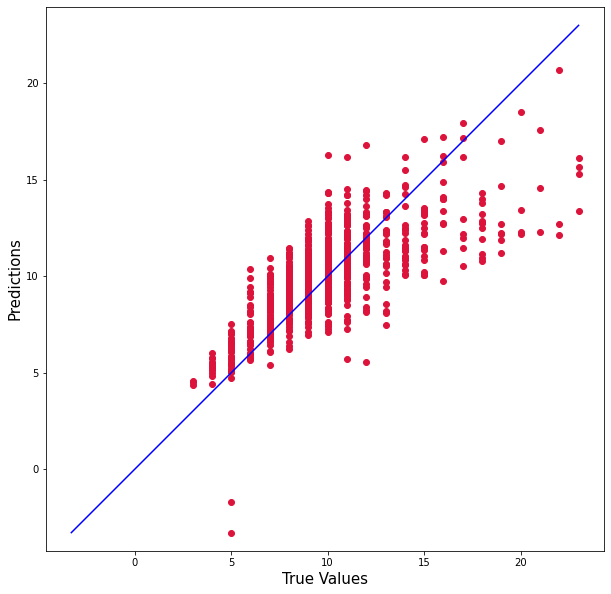

In [297]:
#plot Original lavel and Predicticted level fit curve
plt.figure(figsize=(10,10))
true_value=y_test
predicted_value=preds
plt.scatter(true_value, predicted_value, c='crimson')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### From this figure we see that after using LV 5 we found good fit of original label with Predicted label

### PLS

In [286]:
#partial Least Squares regression (PLS) 
from sklearn.cross_decomposition import PLSRegression
X = X_train
Y = y_train
pls2 = PLSRegression(n_components=2)
pls2.fit(X, Y)
PLSRegression()
y_pred = pls2.predict(X_test)

PLS_score_test = mean_squared_error(y_test, y_pred, squared=False)

print('mean_squared_error','with PLS Methods',':', PLS_score_test)

mean_squared_error with PLS Methods : 2.337567303105809


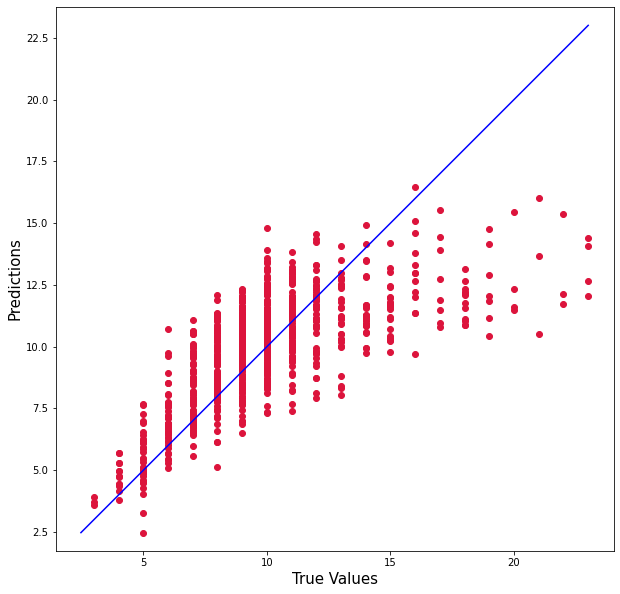

In [298]:
plt.figure(figsize=(10,10))
true_value=y_test
predicted_value=y_pred
plt.scatter(true_value, predicted_value, c='crimson')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

##### After running PLS model we see it has higer error rate and line does not fit as good we observed from PCR.

##### From PCR we can say that keeping 5 variable produce a good result for Ring prediction and those are Sex, Length, Diameter, Height, and Whole_weight.

#### However, the removal of variables like Shucked_weight, Viscera_weight, and Shell_weight might not affect largly  for prediction of RING.